### Projects - Gender Prediction

In [1]:
import nltk
import random

In [2]:
from nltk.corpus import names

In [5]:
# nltk.download('names')
names.fileids()

['female.txt', 'male.txt']

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
cfd = nltk.ConditionalFreqDist((fileid, name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

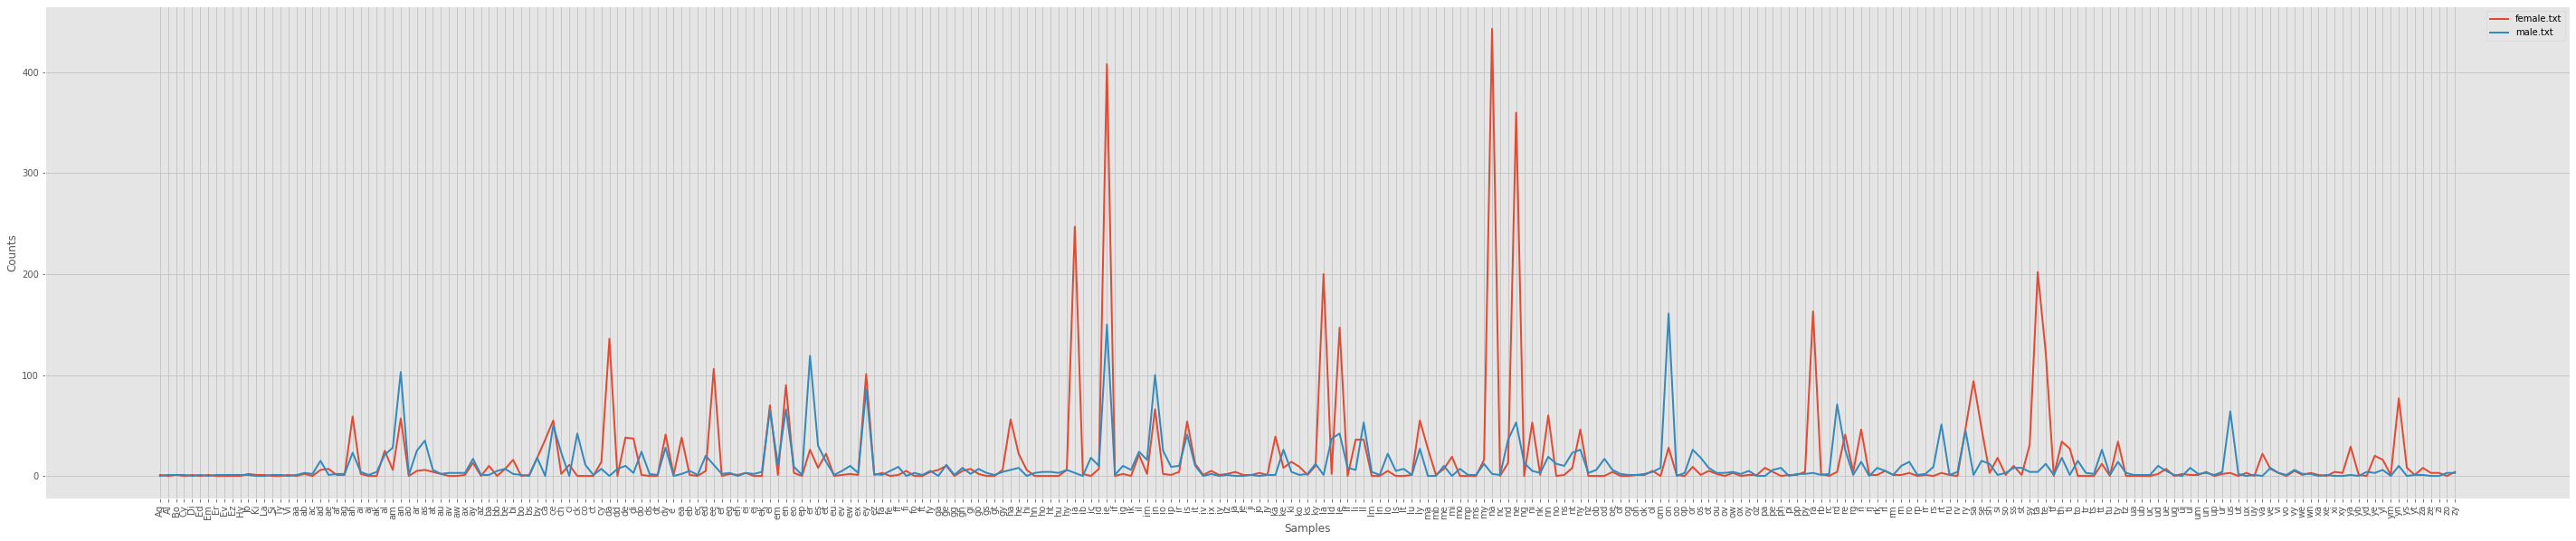

In [11]:
plt.figure(figsize = (50, 10))
cfd.plot()

The plot shows us that a decent numbner of ending letter pairs have tend to lean towords female or male names. Let's use this as our feature to build a feature set.

In [12]:
def name_feature(name):
    return {'pair': name[-2:]}

In [13]:
name_feature("Katy")

{'pair': 'ty'}

In [14]:
name_list = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

In [15]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [16]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [17]:
random.shuffle(name_list)

In [18]:
name_list[:10]

[('Claude', 'male'),
 ('Jay', 'male'),
 ('Apollo', 'male'),
 ('Ilona', 'female'),
 ('Wenona', 'female'),
 ('Melantha', 'female'),
 ('Yolanda', 'female'),
 ('Faunie', 'female'),
 ('Liane', 'female'),
 ('Chriss', 'female')]

In [20]:
features = [(name_feature(name), gender) for (name, gender) in name_list]

In [21]:
features[:10]

[({'pair': 'de'}, 'male'),
 ({'pair': 'ay'}, 'male'),
 ({'pair': 'lo'}, 'male'),
 ({'pair': 'na'}, 'female'),
 ({'pair': 'na'}, 'female'),
 ({'pair': 'ha'}, 'female'),
 ({'pair': 'da'}, 'female'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'ss'}, 'female')]

In [22]:
len(features)/2

3972.0

In [23]:
training_set = features[:3972]
testing_set = features[3972:]

In [24]:
# We can use the Naive Bayes Classifier to train our model. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [28]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [29]:
male_names = names.words('male.txt')
"Carmello" in male_names

False

In [30]:
classifier.classify(name_feature("Carmello"))

'male'

In [31]:
nltk.classify.accuracy(classifier, testing_set)

0.7862537764350453